Author: [Valentin Lehuger](https://github.com/valentinlehuger)

Skip the run test because the ROME version has to be updated to make it work in the exported repository. TODO: Update ROME and remove the `skiptest` flag.


# BMO ROME analysis

This notebook is about how the mapping between BMO and ROME works and how to interpret the differents job categroy identifiers.

The ROME is a job classification created by the french employment agency "pole emploi" and the BMO is a study of labour market emitted by a Statistics agency.

In [1]:
%matplotlib inline

import codecs
import os

import pandas as pd
import seaborn as sns

data_path = '../../../data'

## Load BMO datas

In [2]:
bmo_df = pd.read_csv(os.path.join(data_path, 'bmo/bmo_2015.csv'))
bmo_df.sample(frac=0.0001)

,CATCHMENT_AREA_CODE,CATCHMENT_AREA_NAME,DEPARTEMENT_CODE,DEPARTEMENT_NAME,FAP_CODE,FAP_NAME,NB_DIFF_RECRUT_PROJECTS,NB_RECRUT_PROJECTS,NB_SEASON_RECRUT_PROJECTS,PROFESSION_FAMILY_CODE,PROFESSION_FAMILY_NAME,REGION_CODE,REGION_LIB
28140,8243,VAULX MEYZIEU,69,RHÔNE,V1Z80,"Infirmiers, cadres infirmiers et puéricultrices",25.263362,38.398905,8.462230,S,Fonctions sociales et médico-sociales,82,RHONE-ALPES
37836,9410,CALVI ILE ROUSSE,2B,HAUTE-CORSE,R0Z60,Employés de libre-service,0.000000,170.403971,150.771005,V,"Fonctions liées à la vente, au tourisme et aux...",94,CORSE
11074,3104,FLANDRE LYS,59,NORD,V0Z60,"Aides-soignants (aides médico-psychologiques, ...",9.791437,40.126572,17.601756,S,Fonctions sociales et médico-sociales,31,NORD-PAS-DE-CALAIS
15541,5222,LA BAULE,44,LOIRE-ATLANTIQUE,S0Z42,"Boulangers, pâtissiers",0.000000,13.379870,0.000000,V,"Fonctions liées à la vente, au tourisme et aux...",52,PAYS DE LA LOIRE


In [3]:
# Select useful columns of codes and names
bmo_df = bmo_df[[u'PROFESSION_FAMILY_CODE', u'PROFESSION_FAMILY_NAME', u'FAP_CODE', u'FAP_NAME']]

bmo_df = bmo_df.sort_values(['PROFESSION_FAMILY_CODE', 'FAP_CODE'])

# create correspondance profession_family/fap codes df
FAP_profession_family = bmo_df[[u'PROFESSION_FAMILY_CODE', u'FAP_CODE']].drop_duplicates()

# Create correspondance code/name dfs
profession_family_correspondance = bmo_df[[u'PROFESSION_FAMILY_CODE', u'PROFESSION_FAMILY_NAME']].drop_duplicates()
FAP_correspondance = bmo_df[[u'FAP_CODE', u'FAP_NAME']].drop_duplicates().sort_values([u'FAP_CODE'])

This document (http://travail-emploi.gouv.fr/IMG/pdf/FAP-2009_Introduction_et_table_de_correspondance.pdf) gives a very good explanation of how the FAP codes are built.

The first character is the professional field. (A = Agriculture, marins, fishing / B = Civil engineering / C = Electricity, electronics, etc)

The second and third characters are used to group 87 FAP categories.

The fourth character indicatesthe qualification level. (0 = undefined, 2 = unskilled worker to 9 = engineer and manager)

The fifth character is used to group the professionnal families in to 225 more specific categories.

## Load ROME datas

In [4]:
rome_df = pd.read_csv(os.path.join(data_path, 'rome/csv/unix_referentiel_appellation_v330_utf8.csv'))

# Select useful columns of codes and names
rome_df = rome_df[['code_ogr', 'libelle_appellation_court', 'code_rome']]
rome_df.columns = [u'OGR_CODE', u'ROME_PROFESSION_SHORT_NAME', u'ROME_PROFESSION_CARD_CODE']
rome_df = rome_df[[u'OGR_CODE', u'ROME_PROFESSION_SHORT_NAME', u'ROME_PROFESSION_CARD_CODE']].drop_duplicates().sort_values([u'OGR_CODE', u'ROME_PROFESSION_CARD_CODE'])

In [5]:
print("{} uniques romes.".format(len(rome_df.ROME_PROFESSION_CARD_CODE.unique())))

531 uniques romes.


In [6]:
rome_df[rome_df.ROME_PROFESSION_CARD_CODE == "L1503"]

,OGR_CODE,ROME_PROFESSION_SHORT_NAME,ROME_PROFESSION_CARD_CODE
3,10203,Accessoiriste,L1503
4,10204,Accessoiriste de plateau,L1503
5,10205,Accessoiriste en effets spéciaux,L1503
934,11143,Armurier / Armurière spectacle,L1503
942,11151,Artificier / Artificière spectacle,L1503
943,11152,Artificier / Artificière spectacles pyrotechni...,L1503
1052,11261,Assistant décorateur / Assistante décoratrice ...,L1503
1773,12002,Chef accessoiriste,L1503
1787,12016,Chef constructeur / constructrice en décors,L1503
2146,12383,Chef décorateur / décoratrice spectacle,L1503


## Load BMO/ROME correspondance

In [7]:
def parse_faprome_file(filename):
    with codecs.open(filename, 'r', 'latin-1') as txtfile:
        table = pd.DataFrame([x.replace('"', '').split("=") for x in txtfile.readlines() if x.startswith('"')])
    return table
    
bmo_rome = parse_faprome_file(os.path.join(data_path, 'crosswalks/passage_fap2009_romev3.txt'))
bmo_rome[0] = bmo_rome.apply(lambda x: [s.strip() for s in x[0].split(',')], axis=1)
bmo_rome[1] = bmo_rome.apply(lambda x: x[1].replace('\n', '').replace('\r', '').replace('\t', '').strip(), axis=1)

bmo_rome.columns = [u"ROME", u"FAP"]

s = bmo_rome.ROME.apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = u"ROME"

bmo_rome = bmo_rome[[u"FAP"]].join(s)
bmo_rome_entire = bmo_rome
bmo_rome = bmo_rome[bmo_rome.ROME.str.len() == 5]

In [8]:
print("{} uniques romes.".format(len(bmo_rome.ROME.unique())))

330 uniques romes.


In [9]:
bmo_rome.head()

,FAP,ROME
0,A0Z41,A1403
0,A0Z41,A1407
0,A0Z41,A1408
0,A0Z41,A1409
0,A0Z41,A1410


In [10]:
A = pd.merge(bmo_rome, rome_df, left_on="ROME", right_on=u"ROME_PROFESSION_CARD_CODE")[["FAP", "ROME", "OGR_CODE", "ROME_PROFESSION_SHORT_NAME"]]

In [11]:
bmo_rome_merged = pd.merge(A, bmo_df, left_on="FAP", right_on="FAP_CODE").drop_duplicates()[["FAP", "ROME", "OGR_CODE", "ROME_PROFESSION_SHORT_NAME", "PROFESSION_FAMILY_CODE", "PROFESSION_FAMILY_NAME", "FAP_NAME"]]
bmo_rome_merged.head()

,FAP,ROME,OGR_CODE,ROME_PROFESSION_SHORT_NAME,PROFESSION_FAMILY_CODE,PROFESSION_FAMILY_NAME,FAP_NAME
0,A0Z41,A1403,10811,Aide agricole en production laitière,Z,Autres métiers,Éleveurs salariés
228,A0Z41,A1403,10825,Aide de conchyliculture,Z,Autres métiers,Éleveurs salariés
456,A0Z41,A1403,10829,Aide de pisciculture,Z,Autres métiers,Éleveurs salariés
684,A0Z41,A1403,10832,Aide d''élevage aquacole,Z,Autres métiers,Éleveurs salariés
912,A0Z41,A1403,10833,Aide d''élevage bovin,Z,Autres métiers,Éleveurs salariés


In [12]:
bmo_rome_merged.sample(frac=0.01).head()

,FAP,ROME,OGR_CODE,ROME_PROFESSION_SHORT_NAME,PROFESSION_FAMILY_CODE,PROFESSION_FAMILY_NAME,FAP_NAME
1025508,U1Z80,L1302,18184,Programmateur / Programmatrice de spectacles,C,Fonctions d'encadrement,Professionnels des spectacles
1356732,W0Z90,K2109,18177,Professeur(e) technique d''enseignement profes...,C,Fonctions d'encadrement,Professeurs du secondaire
1005808,U0Z90,L1303,11556,Booker / Bookeuse,C,Fonctions d'encadrement,Cadres de la communication
445446,L2Z61,M1602,14757,Employé / Employée de bureau,A,Fonctions administratives,"Agents administratifs divers (saisie, assistan..."
1345142,W0Z80,K2106,18161,Professeur / Professeure des écoles,C,Fonctions d'encadrement,Professeurs des écoles


There are 4 kinds of codes to describe jobs in ROME and BMO datasets

Identifiers created by Pole emploi : ROME and OGR_CODE
Identifiers created by DARES (Statistics Agency) : FAP and PROFESSION_FAMILY_CODE

From larger to smaller groups, we get :
PROFESSION_FAMILY_CODE > FAP > ROME_CODE > OGR_CODE

In the ROME classification, the OGR_CODE is the most accurate job identifier
(example: props or pyrotechnist or marketing director).

In [13]:
rome_df[rome_df.ROME_PROFESSION_CARD_CODE == "L1503"].head()

,OGR_CODE,ROME_PROFESSION_SHORT_NAME,ROME_PROFESSION_CARD_CODE
3,10203,Accessoiriste,L1503
4,10204,Accessoiriste de plateau,L1503
5,10205,Accessoiriste en effets spéciaux,L1503
934,11143,Armurier / Armurière spectacle,L1503
942,11151,Artificier / Artificière spectacle,L1503


A ROME_PROFESSION_CARD_CODE is a group of OGR_CODE for very similar jobs in one field on a same hierarchical level.
(example in entertainment field: props, pyrotechnist, steward are under the same ROME_PROFESSION_CARD_CODE)

In [14]:
bmo_rome_merged[bmo_rome_merged.FAP == "U1Z80"].sample(frac=0.05)

,FAP,ROME,OGR_CODE,ROME_PROFESSION_SHORT_NAME,PROFESSION_FAMILY_CODE,PROFESSION_FAMILY_NAME,FAP_NAME
1026560,U1Z80,L1302,19378,Secrétaire de production cinéma,C,Fonctions d'encadrement,Professionnels des spectacles
1053386,U1Z80,L1504,14642,Electricien / Electricienne spectacle,C,Fonctions d'encadrement,Professionnels des spectacles
1055753,U1Z80,L1504,38470,Pupitreur / Pupitreuse image,C,Fonctions d'encadrement,Professionnels des spectacles
1069429,U1Z80,L1507,38166,Monteur / Monteuse sous titres,C,Fonctions d'encadrement,Professionnels des spectacles
1071533,U1Z80,L1508,11207,Assistant chef opérateur / Assistante chef opé...,C,Fonctions d'encadrement,Professionnels des spectacles
1056805,U1Z80,L1505,11316,Assistant opérateur / Assistante opératrice de...,C,Fonctions d'encadrement,Professionnels des spectacles
1021300,U1Z80,L1302,14266,Directeur / Directrice de la danse,C,Fonctions d'encadrement,Professionnels des spectacles
1061013,U1Z80,L1505,20284,Technicien / Technicienne vidéo,C,Fonctions d'encadrement,Professionnels des spectacles
1039447,U1Z80,L1501,12699,Coiffeur-posticheur / Coiffeuse-posticheuse sp...,C,Fonctions d'encadrement,Professionnels des spectacles
1038395,U1Z80,L1501,12599,Chef posticheur / posticheuse spectacle,C,Fonctions d'encadrement,Professionnels des spectacles


The FAP code is a larger group of jobs which can include multiple ROME_PROFESSION_CARD_CODE in same a field with differents hierarchical levels.
(example: props, pyrotechnist, steward are grouped with production manager and ballet director)

In [15]:
bmo_rome_merged[bmo_rome_merged.PROFESSION_FAMILY_CODE == "C"].head()

,FAP,ROME,OGR_CODE,ROME_PROFESSION_SHORT_NAME,PROFESSION_FAMILY_CODE,PROFESSION_FAMILY_NAME,FAP_NAME
111528,B7Z91,F1203,12079,Chef de carrière,C,Fonctions d'encadrement,"Ingénieurs du bâtiment et des travaux publics,..."
111726,B7Z91,F1203,12092,Chef de chantier de forage,C,Fonctions d'encadrement,"Ingénieurs du bâtiment et des travaux publics,..."
111924,B7Z91,F1203,12098,"Chef de chantier pétrole, gaz",C,Fonctions d'encadrement,"Ingénieurs du bâtiment et des travaux publics,..."
112122,B7Z91,F1203,12153,Chef de gisement,C,Fonctions d'encadrement,"Ingénieurs du bâtiment et des travaux publics,..."
112320,B7Z91,F1203,12194,Chef de mission prospection minière,C,Fonctions d'encadrement,"Ingénieurs du bâtiment et des travaux publics,..."


PROFESSION_FAMILY_CODE is the largest group of all identifiers. Each classification id includes many FAP codes.
It contains 7 class of jobs within Administrative jobs, social and medical jobs, etc...

## Distribution of ROME count by FAP

mean : 2.4154
standard deviation : 1.9600
89.23% of FAP contains less than 5 ROME.


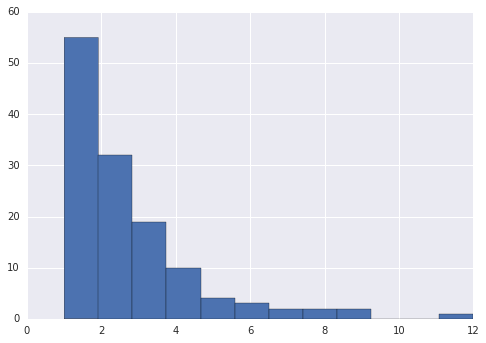

In [16]:
unique_fap_rome_couples = bmo_rome_merged[["FAP", "ROME"]].drop_duplicates()
rome_by_fap_count = unique_fap_rome_couples.groupby("FAP")["ROME"].count()

rome_by_fap_count.hist(bins=rome_by_fap_count.max())
print("mean : {0:.4f}".format(rome_by_fap_count.mean()))
print("standard deviation : {0:.4f}".format(rome_by_fap_count.std()))

print("{0:.2f}% of FAP contains less than 5 ROME.".format(rome_by_fap_count[rome_by_fap_count <= 4].count() / 130. * 100))

The FAP code seems to be a pretty low level of job groups. 2/3 FAP contains one or two ROME.

In [17]:
FAP_correspondance[FAP_correspondance.FAP_CODE.isin(rome_by_fap_count[rome_by_fap_count < 5].index)].sample(frac=0.3)

,FAP_CODE,FAP_NAME
651,E2Z80,Agents de maîtrise et assimilés des industries...
73,S2Z61,"Serveurs de cafés, de restaurants et commis"
126,Q2Z90,Cadres de la banque
193,U0Z90,Cadres de la communication
7,R4Z91,Ingénieurs et cadres technico-commerciaux
89,W1Z80,Formateurs (y compris moniteurs d'auto-école)
410,J6Z90,Ingénieurs et cadres des transports
231,G0A41,Ouvriers qualifiés de la maintenance en électr...
194,U0Z91,Cadres et techniciens de la documentation
52,R0Z60,Employés de libre-service


The designations of FAP under 5 ROME are very specific. For example doctors (V2Z90), dentists (V2Z91), pharmacists (V2Z93), telemarketers (R1Z67)

In [18]:
FAP_correspondance[FAP_correspondance.FAP_CODE.isin(rome_by_fap_count[rome_by_fap_count >= 5].index)]

,FAP_CODE,FAP_NAME
23,A0Z41,Éleveurs salariés
386,F5Z70,"Techniciens et agents de maîtrise, matériaux s..."
154,G1Z70,Techniciens et agents de maîtrise de la mainte...
305,L5Z90,"Cadres administratifs, comptables et financier..."
6,R1Z62,"Vendeurs en habillement, accessoires et articl..."
63,R4Z90,"Cadres commerciaux, acheteurs et cadres de la ..."
191,T4Z62,Ouvriers de l'assainissement et du traitement ...
281,T6Z61,Employés des services funéraires et autres ser...
16,U1Z80,Professionnels des spectacles
17,U1Z82,"Graphistes, dessinateurs, stylistes, décorateu..."


The designations of FAP over 5 ROME are much larger group of jobs as other paramedical professions (V3Z80) or professionnal entertainers (U1Z80).

Although BMO and ROME are created by 2 different agencies, the FAP and ROME codes seems to be well mapped. 
Each FAP contains one or more ROME code.
Most FAP categories are very specific as 90% contains less than 5 ROME codes.